In [1]:
#Import dependencies
import pandas as pd
from path import Path
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#read crypto_data.csv into Pandas.  The dataset was obtained from CryptoCompare.

crypto_df = pd.read_csv("crypto_data.csv")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Discard all cryptocurrencies that are not being traded

In [4]:
#print counts os stocks being currently traded vs. not currently traded
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
#select only cryptocurrencies being traded
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
crypto_df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
#Drop the "IsTrading" column from data frame
crypto_df = crypto_df.drop('IsTrading', axis = 1)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


### Data Cleanup

In [7]:
#delete all rows with null values
crypto_df = crypto_df.dropna(axis = 0, how='any')
crypto_df.shape

(685, 6)

In [8]:
#filter for cryptocurrencies that have been mined (value > 0)
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
len(crypto_df)

532

In [9]:
#remove 'CoinName' column from dataframe since the information does not contribute
#to data analysis.  remove unnamed column also
crypto_df = crypto_df.drop('CoinName', axis = 1)
crypto_df = crypto_df.drop('Unnamed: 0', axis = 1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [10]:
#convert remaining features with text values, 'Algorithm' and 'ProofType' into
#numerical data using dummy variables.
X = pd.get_dummies(data=crypto_df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### After completing one-hot encoding to convert columns with text to numerical vales, the number of columns increased from 4 to 98.

In [11]:
#standardize the data so that columns with larger values do not unduly
#influence the outcome.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#print scaled data
X_scaled[3]

array([-0.11671506, -0.15255998, -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614,  3.17542648,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951, -0.72111026,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

### Dimensionality Reduction

In [13]:
#Reduce dimensions with PCA
pca = PCA(n_components=.9)
principal_comp = pca.fit_transform(X_scaled)
principal_comp.shape

(532, 74)

Preserving 90% of the explained variance in dimensionality reduction decreased the number of features from 98 to 74.

In [14]:
#Further reduce dataset dimensions with t-SNE
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(principal_comp)


In [15]:
tsne_features.shape

(532, 2)

In [16]:
tsne_features

array([[-12.474976 ,   7.2778225],
       [-16.428127 ,   2.0102434],
       [-21.870575 ,  15.100466 ],
       ...,
       [ 21.134874 , -15.899387 ],
       [ 16.782835 ,  -6.8500133],
       [  6.8105927,   8.07034  ]], dtype=float32)

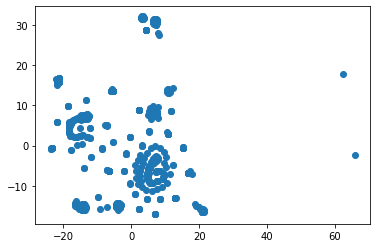

In [17]:
#prepare and plot tsne output
x = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(x,y)
plt.show()

After reducing dimensions with t-SNE, not able to observe distinct clusters.

### Cluster Analysis with k-Means

In [18]:
#identify clusters with k-Means
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(principal_comp)
    inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

C:\Users\tsatr\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44845.490039
3,4,43778.700400
4,5,42518.641991
5,6,42110.072833
6,7,41512.802544
7,8,40100.342804
8,9,39210.120754
9,10,38316.717176


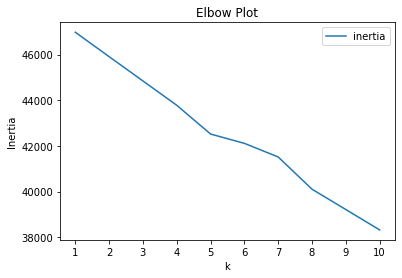

In [19]:
#create elbow plot

elbow_df.plot.line(x='k', y='inertia')
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

## Conclusion - 

#### Based on the results of scaling and analysis of the Cryptocurrency dataset, could not identify clusters or groups.  